In [1]:
import image_slicer
from PIL import Image
from tqdm import tqdm
import concurrent.futures
import glob

from fastai.vision import *
Image.MAX_IMAGE_PIXELS = None
from pathlib import Path

%matplotlib inline

In [ ]:
#p = Path('samples').rglob('*.tif')
#images = [x for x in p if x.is_file()]

#Path('segmented_maps').mkdir(parents=True, exist_ok=True)

def make_tiles(images):
    for image in(images):
        fname = Path(image).stem
        tiles = image_slicer.slice(image, 4, save=False)
        tiles = image_slicer.save_tiles(tiles, prefix=fname, format='jpeg')
    return tiles 

#images = glob.glob("samples/*.tif")
#make_tiles(images)

#def pool_slice(root_dir, extension):
with concurrent.futures.ProcessPoolExecutor() as executor:
    images = glob.glob('maps/*.tiff')
    result = executor.map(make_tiles, images)

In [6]:
def slice_map_pool(image):
    fname = Path(image).stem
    tiles = image_slicer.slice(image, 64, save=False)
    image_slicer.save_tiles(tiles, prefix=fname, directory='slices_64', format='jpeg')

with concurrent.futures.ProcessPoolExecutor() as executor:
    image_files = glob.glob("maps/*.tiff")    
    result = executor.map(slice_map_pool, image_files)

In [2]:
map_tiles = glob.glob('slices_64/*.jpg')
map_tiles

['slices_64/126516545.27_01_02_03_05.jpg',
 'slices_64/126515555.27_02_02_05_03.jpg',
 'slices_64/126516545.27_01_01_04_04.jpg',
 'slices_64/126515555.27_02_01_02_02.jpg',
 'slices_64/126516545.27_01_01_08_04.jpg',
 'slices_64/126516545.27_01_01_01_08.jpg',
 'slices_64/126516545.27_01_01_06_01.jpg',
 'slices_64/126515555.27_02_02_07_06.jpg',
 'slices_64/126515555.27_02_02_07_07.jpg',
 'slices_64/126516545.27_01_02_01_01.jpg',
 'slices_64/126516545.27_01_02_06_08.jpg',
 'slices_64/126516545.27_01_01_08_05.jpg',
 'slices_64/126515555.27_02_01_02_03.jpg',
 'slices_64/126516545.27_01_01_04_05.jpg',
 'slices_64/126515555.27_02_02_05_02.jpg',
 'slices_64/126516545.27_01_02_03_04.jpg',
 'slices_64/126516545.27_01_02_03_06.jpg',
 'slices_64/126516545.27_01_01_04_07.jpg',
 'slices_64/126515555.27_02_01_05_08.jpg',
 'slices_64/126515555.27_02_01_02_01.jpg',
 'slices_64/126516545.27_01_01_08_07.jpg',
 'slices_64/126516545.27_01_01_06_02.jpg',
 'slices_64/126516545.27_01_02_01_03.jpg',
 'slices_64

In [8]:
from pigeon import annotate
from IPython.display import display, Image

annotations = annotate(
  map_tiles,
  options=['building', 'no_building'],
  display_fn=lambda filename: display(Image(filename))
)

HTML(value='0 examples annotated, 257 examples left')

Output()

In [4]:
annotations

[('slices_64/126516545.27_01_02_03_05.jpg', 'building'),
 ('slices_64/126515555.27_02_02_05_03.jpg', 'no_building'),
 ('slices_64/126516545.27_01_01_04_04.jpg', 'building'),
 ('slices_64/126515555.27_02_01_02_02.jpg', 'no_building'),
 ('slices_64/126516545.27_01_01_08_04.jpg', 'building'),
 ('slices_64/126516545.27_01_01_01_08.jpg', 'no_building'),
 ('slices_64/126516545.27_01_01_06_01.jpg', 'building'),
 ('slices_64/126515555.27_02_02_07_06.jpg', 'no_building'),
 ('slices_64/126515555.27_02_02_07_07.jpg', 'no_building'),
 ('slices_64/126516545.27_01_02_01_01.jpg', 'no_building'),
 ('slices_64/126516545.27_01_02_06_08.jpg', 'no_building'),
 ('slices_64/126516545.27_01_01_08_05.jpg', 'building'),
 ('slices_64/126515555.27_02_01_02_03.jpg', 'no_building'),
 ('slices_64/126516545.27_01_01_04_05.jpg', 'building'),
 ('slices_64/126515555.27_02_02_05_02.jpg', 'no_building'),
 ('slices_64/126516545.27_01_02_03_04.jpg', 'building'),
 ('slices_64/126516545.27_01_02_03_06.jpg', 'building'),
 ('s

In [4]:
import pickle 

In [5]:
with open('annotations.pkl', 'wb') as annotations_dump:
    pickle.dump(annotations, annotations_dump)

In [6]:
with open('annotations.pkl','rb') as annotations_file:
    annotations = pickle.load(annotations_file)

In [7]:
annotations

[('slices_64/126516545.27_01_02_03_05.jpg', 'building'),
 ('slices_64/126515555.27_02_02_05_03.jpg', 'no_building'),
 ('slices_64/126516545.27_01_01_04_04.jpg', 'building'),
 ('slices_64/126515555.27_02_01_02_02.jpg', 'no_building'),
 ('slices_64/126516545.27_01_01_08_04.jpg', 'building')]

In [51]:
labels_dict = dict(annotations)

In [52]:
labels_dict['slices_64/126515555.27_02_01_02_03.jpg']

'no_building'

In [53]:
func = lambda x: labels_dict[str(x)]

In [54]:
building_data = (ImageList.from_folder('slices_64') #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct(0.2)
        .label_from_func(func)
        .transform(size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch())        

In [55]:
building_data

ImageDataBunch;

Train: LabelList (205 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
building,no_building,building,no_building,building
Path: slices_64;

Valid: LabelList (51 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
building,no_building,building,building,no_building
Path: slices_64;

Test: None

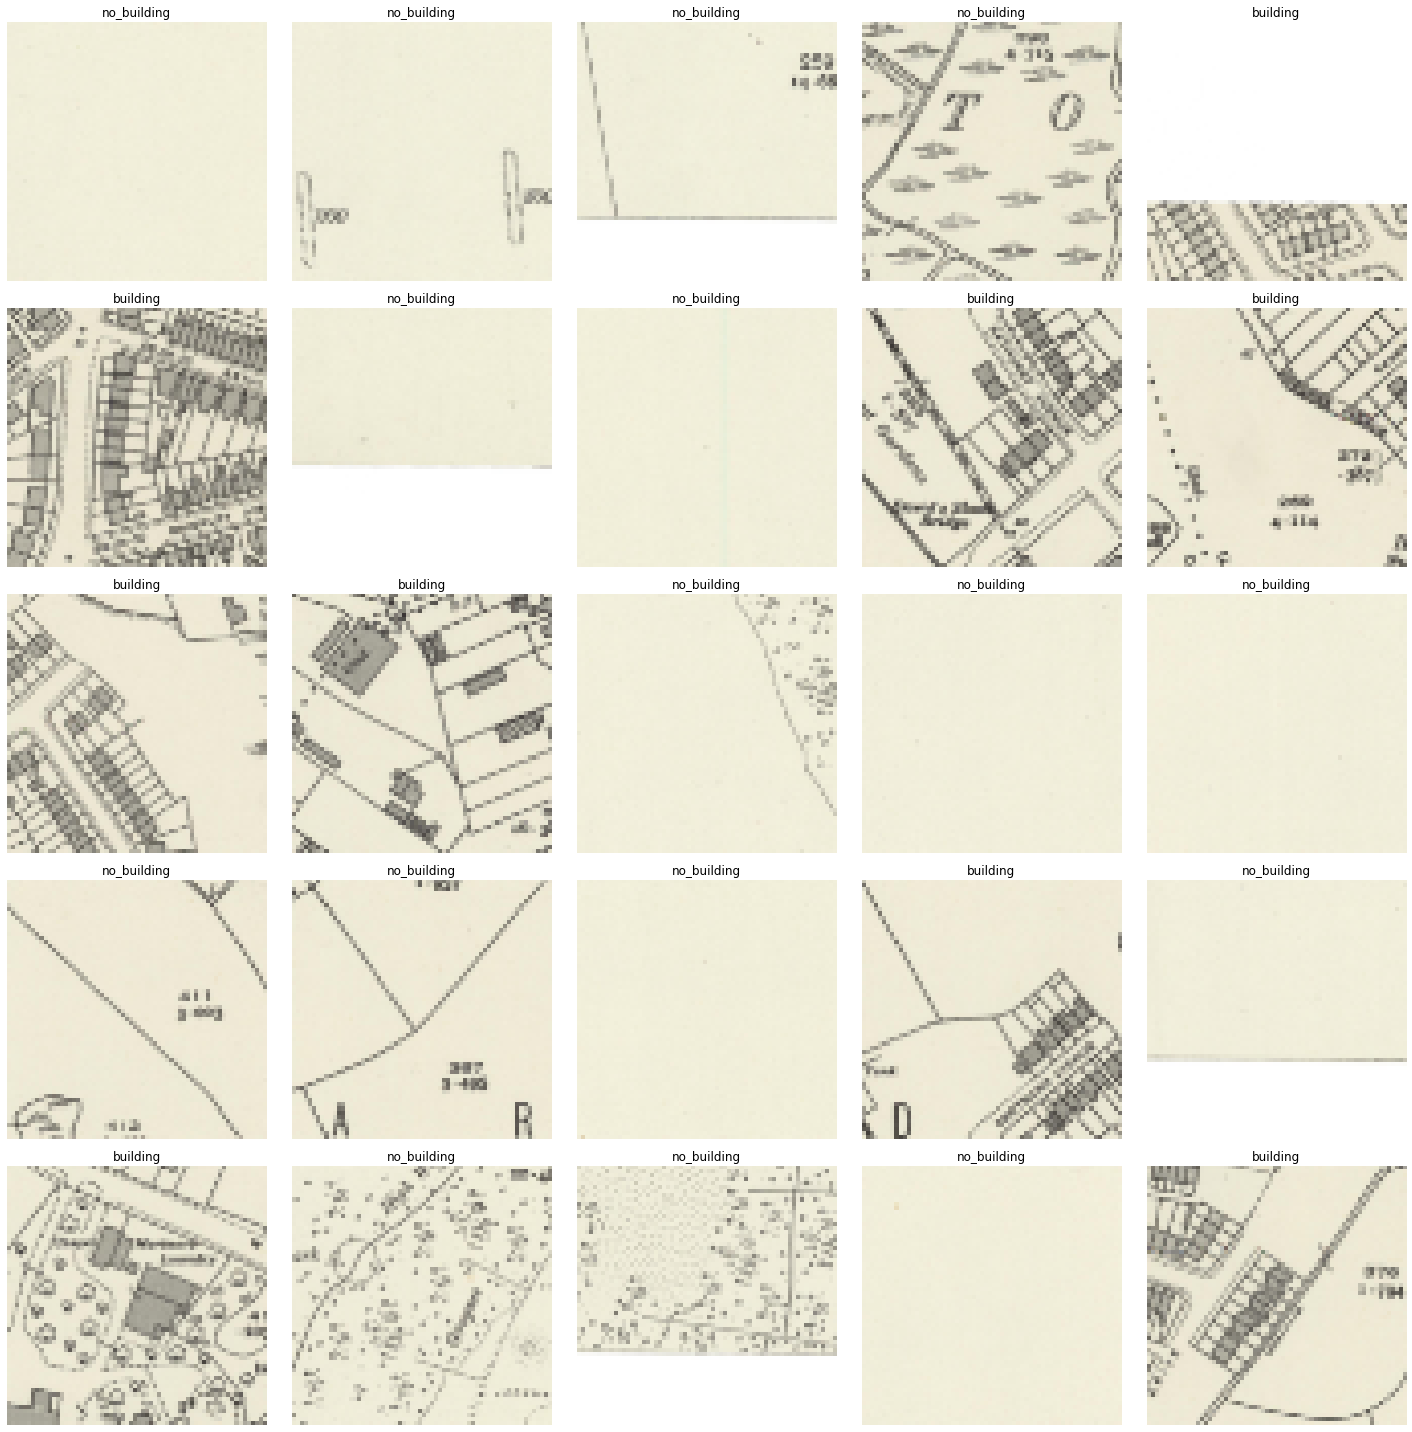

In [56]:
building_data.show_batch()

In [57]:
learn = cnn_learner(building_data, models.resnet34, metrics=accuracy)

In [58]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


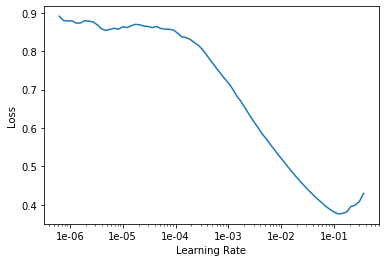

In [59]:
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(5, max_lr=1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.794478,1.054210,0.372549,00:05
1,0.469537,2.246126,0.431373,00:04
2,0.327655,1.466121,0.529412,00:05
3,0.260151,0.573303,0.803922,00:05
4,0.209038,0.700507,0.764706,00:05


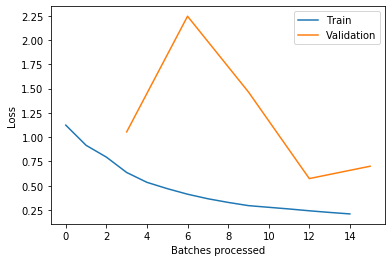

In [61]:
learn.recorder.plot_losses()

In [62]:
building_data_2 = (ImageList.from_folder('slices_64') #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct(0.2)
        .label_from_func(func)
        .transform(size=128)       #Data augmentation? -> use tfms with a size of 64
        .databunch())

In [63]:
learn.data = building_data_2

In [64]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


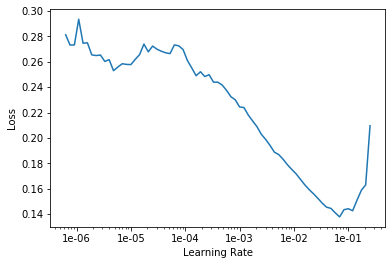

In [65]:
learn.recorder.plot()

In [66]:
learn.fit_one_cycle(5, max_lr=1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.226318,0.273058,0.882353,00:10
1,0.206983,0.254286,0.921569,00:10
2,0.169966,0.361761,0.882353,00:10
3,0.139382,0.309826,0.901961,00:10
4,0.110557,0.223032,0.921569,00:10


In [67]:
building_data_3 = (ImageList.from_folder('slices_64') #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct(0.2)
        .label_from_func(func)
        .transform(size=256)       #Data augmentation? -> use tfms with a size of 64
        .databunch())     

In [68]:
learn.data = building_data_3

In [71]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


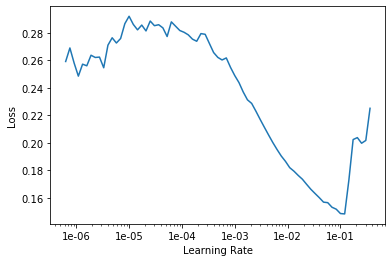

In [72]:
learn.recorder.plot()

In [73]:
learn.fit_one_cycle(5, max_lr=1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.259088,0.267821,0.901961,00:31
1,0.211812,0.182513,0.941176,00:31
2,0.156351,0.170752,0.941176,00:33
3,0.119051,0.186347,0.941176,00:33
4,0.096933,0.175934,0.941176,00:32


In [78]:
building_data_4 = (ImageList.from_folder('slices_64') #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct(0.3)
        .label_from_func(func)
        .transform(size=512)       #Data augmentation? -> use tfms with a size of 64
        .databunch())     

In [79]:
learn.data = building_data_4

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


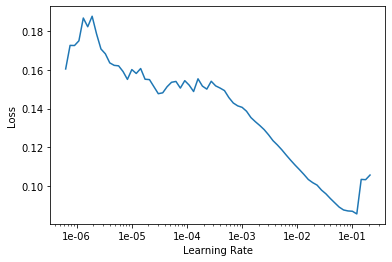

In [76]:
learn.lr_find()
learn.recorder.plot()

In [80]:
learn.fit_one_cycle(5, max_lr=1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.020048,0.022270,0.986842,01:47
1,0.019688,0.019282,0.986842,01:50
2,0.018407,0.028357,0.986842,01:30
3,0.015229,0.034258,0.973684,01:45
4,0.013624,0.031601,0.973684,01:34


In [86]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (180 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
building,building,building,no_building,no_building
Path: slices_64;

Valid: LabelList (76 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
no_building,no_building,no_building,building,no_building
Path: slices_64;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05,

In [97]:
Image.MAX_IMAGE_PIXELS = None
image = '117917133.27.tif'

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

In [ ]:
img

In [ ]:
def predict_tiles(image):
    tiles = image_slicer.slice(image, 64, save=False)
    for tile in tiles:
        img = open_image(tile.image)
        pred_class,pred_idx,outputs = learn.predict(img)
        print(pred_class,pred_idx)
#predict_tiles('117917133.27.tif')

In [ ]:
import numpy as np
image = '117917133.27.tif'
tiles = image_slicer.slice(image, 32, save=False)
for tile in tiles:
    #print(type(tile.image))
    x = np.array(tile.image)
  #  x = np.random.randn(3, 256, 256)
    img = Image(torch.from_numpy(x).float())
    learn.predict(img)


In [ ]:
new_map = '117917133.27.tif'

In [ ]:
def slice_map(image):
    fname = Path(image).stem
    tiles = image_slicer.slice(image, 32, save=False)
    image_slicer.save_tiles(tiles, prefix=fname, directory='test', format='jpeg')


In [ ]:
slice_map(new_map)

In [26]:
test_tiles = glob.glob('test/*.jpg')


In [27]:
for tile in test_tiles:
    img = open_image(tile)
    pred_class,pred_idx,outputs = learn.predict(img)
    print(tile)
    print(pred_class,pred_idx,outputs)
    print('------------------')
    

test/117917133.27_03_05.jpg
no_building tensor(1) tensor([0.4759, 0.5241])
------------------
test/117917133.27_01_01.jpg
no_building tensor(1) tensor([0.0266, 0.9734])
------------------
test/117917133.27_03_04.jpg
no_building tensor(1) tensor([0.3277, 0.6723])
------------------
test/117917133.27_03_06.jpg
building tensor(0) tensor([0.9933, 0.0067])
------------------
test/117917133.27_01_03.jpg
no_building tensor(1) tensor([0.4238, 0.5762])
------------------
test/117917133.27_01_02.jpg
no_building tensor(1) tensor([0.2886, 0.7114])
------------------
test/117917133.27_03_03.jpg
building tensor(0) tensor([0.5042, 0.4958])
------------------
test/117917133.27_01_06.jpg
no_building tensor(1) tensor([0.4639, 0.5361])
------------------
test/117917133.27_03_02.jpg
no_building tensor(1) tensor([0.0977, 0.9023])
------------------
test/117917133.27_01_05.jpg
no_building tensor(1) tensor([0.1704, 0.8296])
------------------
test/117917133.27_01_04.jpg
no_building tensor(1) tensor([0.2596, 